In [1]:
from datetime import datetime
import time
import numpy as np
import pandas as pd
from pykrx import stock

In [2]:
latest_date = '20230516'

In [3]:
def get_stock_fundamental(date, ticker):
    # 펀더멘탈 정보 읽어 오기
    df_stock = stock.get_market_fundamental(date, date, ticker)
    # 인덱스 이름 제거
    df_stock.index.name = None
    # 인덱스를 티커로 변경
    df_stock.index = [ticker]
    # 이름 읽어 오기
    name = stock.get_market_ticker_name(ticker)
    # 첫 번째 열에 삽입하기
    df_stock.insert(0, 'Name', name)
    # 주식 데이터 리턴
    return df_stock

In [4]:
# 코스피 상장 주식을 시가총액 순으로 가져 오기
df_kospi = stock.get_market_cap(latest_date, market='KOSPI')

In [5]:
df_kospi.head()

,종가,시가총액,거래량,거래대금,상장주식수
티커,,,,,
005930,65400,390423778770000,12334657,808481599858,5969782550
373220,540000,126360000000000,178059,96682716000,234000000
000660,90400,65811413796000,5121364,460164236500,728002365
207940,790000,56227460000000,24523,19340957000,71174000
051910,695000,49061678385000,179012,124980937000,70592343


In [6]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 005930 to 000547
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종가      948 non-null    int64
 1   시가총액    948 non-null    int64
 2   거래량     948 non-null    int64
 3   거래대금    948 non-null    int64
 4   상장주식수   948 non-null    int64
dtypes: int64(5)
memory usage: 44.4+ KB


In [7]:
#시총 상위 200개 주가 펀더멘탈 정보 가져 오기
df_kospi_top_200 = None
start_time = time.time()
for idx, ticker in enumerate(df_kospi.head(200).index):
    print(f'{idx+1:03d}: {ticker}')
    df_stock_fundamental = get_stock_fundamental(latest_date, ticker)
    display(df_stock_fundamental)
    if df_kospi_top_200 is None:
        df_kospi_top_200 = df_stock_fundamental
    else:
        df_kospi_top_200 = pd.concat([df_kospi_top_200, df_stock_fundamental])
    time.sleep(1)
end_time = time.time()
print('')
print('')
print('*'*50)
print(f'소요 시간: {round(end_time - start_time)} seconds')
print('*'*50)

001: 005930


,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,57822,8.12,1.13,8057,2.21,1444


002: 373220


,Name,BPS,PER,PBR,EPS,DIV,DPS
373220,LG에너지솔루션,80052,163.34,6.75,3306,0.0,0


003: 000660


,Name,BPS,PER,PBR,EPS,DIV,DPS
000660,SK하이닉스,92004,27.88,0.98,3242,1.33,1200


004: 207940


,Name,BPS,PER,PBR,EPS,DIV,DPS
207940,삼성바이오로직스,126233,69.04,6.26,11442,0.0,0


005: 051910


,Name,BPS,PER,PBR,EPS,DIV,DPS
051910,LG화학,445524,29.36,1.56,23670,1.44,10000


006: 006400


,Name,BPS,PER,PBR,EPS,DIV,DPS
006400,삼성SDI,251948,22.99,2.66,29191,0.15,1030


007: 005935


,Name,BPS,PER,PBR,EPS,DIV,DPS
005935,삼성전자우,0,0.0,0.0,0,2.61,1445


008: 005380


,Name,BPS,PER,PBR,EPS,DIV,DPS
005380,현대차,407147,7.1,0.5,28521,3.46,7000


009: 000270


,Name,BPS,PER,PBR,EPS,DIV,DPS
000270,기아,98117,6.47,0.89,13495,4.01,3500


010: 035420


,Name,BPS,PER,PBR,EPS,DIV,DPS
035420,NAVER,151646,41.44,1.37,5007,0.44,914


011: 005490


,Name,BPS,PER,PBR,EPS,DIV,DPS
005490,POSCO홀딩스,692323,8.94,0.54,41456,3.24,12000


012: 035720


,Name,BPS,PER,PBR,EPS,DIV,DPS
035720,카카오,22893,18.06,2.45,3106,0.11,60


013: 068270


,Name,BPS,PER,PBR,EPS,DIV,DPS
068270,셀트리온,28937,44.81,5.81,3751,0.22,375


014: 003670


,Name,BPS,PER,PBR,EPS,DIV,DPS
003670,포스코퓨처엠,31922,203.01,9.71,1527,0.1,300


015: 012330


,Name,BPS,PER,PBR,EPS,DIV,DPS
012330,현대모비스,410816,8.12,0.54,27163,1.81,4000


016: 028260


,Name,BPS,PER,PBR,EPS,DIV,DPS
028260,삼성물산,164524,8.8,0.67,12460,2.1,2300


017: 105560


,Name,BPS,PER,PBR,EPS,DIV,DPS
105560,KB금융,124124,4.5,0.4,10955,5.98,2950


018: 066570


,Name,BPS,PER,PBR,EPS,DIV,DPS
066570,LG전자,116599,16.64,0.95,6640,0.63,700


019: 055550


,Name,BPS,PER,PBR,EPS,DIV,DPS
055550,신한지주,95206,4.09,0.36,8454,5.98,2065


020: 096770


,Name,BPS,PER,PBR,EPS,DIV,DPS
096770,SK이노베이션,233338,9.56,0.76,18511,3.3,5840


021: 003550


,Name,BPS,PER,PBR,EPS,DIV,DPS
003550,LG,164082,7.08,0.54,12422,3.41,3000


022: 032830


,Name,BPS,PER,PBR,EPS,DIV,DPS
032830,삼성생명,124081,7.6,0.54,8817,4.48,3000


023: 086790


,Name,BPS,PER,PBR,EPS,DIV,DPS
086790,하나금융지주,124935,3.51,0.33,11803,8.08,3350


024: 015760


,Name,BPS,PER,PBR,EPS,DIV,DPS
015760,한국전력,63158,0.0,0.3,0,0.0,0


025: 323410


,Name,BPS,PER,PBR,EPS,DIV,DPS
323410,카카오뱅크,11988,45.48,2.1,553,0.32,80


026: 034730


,Name,BPS,PER,PBR,EPS,DIV,DPS
034730,SK,391404,8.34,0.42,19547,3.07,5000


027: 352820


,Name,BPS,PER,PBR,EPS,DIV,DPS
352820,하이브,66995,224.51,4.24,1265,0.0,0


028: 033780


,Name,BPS,PER,PBR,EPS,DIV,DPS
033780,KT&G,80114,9.91,1.05,8489,5.95,5000


029: 017670


,Name,BPS,PER,PBR,EPS,DIV,DPS
017670,SK텔레콤,51911,12.04,0.96,4118,6.69,3320


030: 000810


,Name,BPS,PER,PBR,EPS,DIV,DPS
000810,삼성화재,276525,7.55,0.82,30113,6.07,13800


031: 009150


,Name,BPS,PER,PBR,EPS,DIV,DPS
009150,삼성전기,103702,10.49,1.31,12977,1.54,2100


032: 034020


,Name,BPS,PER,PBR,EPS,DIV,DPS
034020,두산에너빌리티,11146,0.0,1.42,0,0.0,0


033: 329180


,Name,BPS,PER,PBR,EPS,DIV,DPS
329180,HD현대중공업,59566,0.0,1.89,0,0.0,0


034: 259960


,Name,BPS,PER,PBR,EPS,DIV,DPS
259960,크래프톤,108962,18.64,1.82,10666,0.0,0


035: 010130


,Name,BPS,PER,PBR,EPS,DIV,DPS
010130,고려아연,455251,11.35,1.07,42967,4.1,20000


036: 138040


,Name,BPS,PER,PBR,EPS,DIV,DPS
138040,메리츠금융지주,27050,5.44,1.69,8406,0.23,105


037: 011200


,Name,BPS,PER,PBR,EPS,DIV,DPS
011200,HMM,42300,0.91,0.44,20556,6.38,1200


038: 018260


,Name,BPS,PER,PBR,EPS,DIV,DPS
018260,삼성에스디에스,106311,8.21,1.1,14218,2.74,3200


039: 051900


,Name,BPS,PER,PBR,EPS,DIV,DPS
051900,LG생활건강,364213,39.97,1.55,14112,0.71,4000


040: 316140


,Name,BPS,PER,PBR,EPS,DIV,DPS
316140,우리금융지주,39505,2.82,0.3,4191,9.58,1130


041: 003490


,Name,BPS,PER,PBR,EPS,DIV,DPS
003490,대한항공,24426,4.7,0.92,4787,3.33,750


042: 030200


,Name,BPS,PER,PBR,EPS,DIV,DPS
030200,KT,64880,5.99,0.48,5209,6.28,1960


043: 010950


,Name,BPS,PER,PBR,EPS,DIV,DPS
010950,S-Oil,75353,3.99,0.96,18075,7.62,5500


044: 036570


,Name,BPS,PER,PBR,EPS,DIV,DPS
036570,엔씨소프트,157391,17.1,2.33,21456,1.82,6680


045: 024110


,Name,BPS,PER,PBR,EPS,DIV,DPS
024110,기업은행,36302,3.04,0.28,3320,9.5,960


046: 009830


,Name,BPS,PER,PBR,EPS,DIV,DPS
009830,한화솔루션,47292,25.01,0.99,1873,0.0,0


047: 377300


,Name,BPS,PER,PBR,EPS,DIV,DPS
377300,카카오페이,13583,136.36,4.09,407,0.0,0


048: 011170


,Name,BPS,PER,PBR,EPS,DIV,DPS
011170,롯데케미칼,404799,101.17,0.43,1716,2.02,3500


049: 090430


,Name,BPS,PER,PBR,EPS,DIV,DPS
090430,아모레퍼시픽,82107,59.52,1.41,1949,0.59,680


050: 011070


,Name,BPS,PER,PBR,EPS,DIV,DPS
011070,LG이노텍,180261,6.74,1.55,41406,1.49,4150


051: 009540


,Name,BPS,PER,PBR,EPS,DIV,DPS
009540,HD한국조선해양,137382,0.0,0.63,0,0.0,0


052: 302440


,Name,BPS,PER,PBR,EPS,DIV,DPS
302440,SK바이오사이언스,22683,49.69,3.5,1596,0.0,0


053: 086280


,Name,BPS,PER,PBR,EPS,DIV,DPS
086280,현대글로비스,183094,5.08,0.88,31729,3.54,5700


054: 402340


,Name,BPS,PER,PBR,EPS,DIV,DPS
402340,SK스퀘어,118972,23.22,0.36,1837,0.0,0


055: 361610


,Name,BPS,PER,PBR,EPS,DIV,DPS
361610,SK아이이테크놀로지,30501,0.0,2.66,0,0.0,0


056: 028050


,Name,BPS,PER,PBR,EPS,DIV,DPS
028050,삼성엔지니어링,13741,8.61,2.13,3392,0.0,0


057: 271560


,Name,BPS,PER,PBR,EPS,DIV,DPS
271560,오리온,64606,14.41,2.21,9926,0.66,950


058: 326030


,Name,BPS,PER,PBR,EPS,DIV,DPS
326030,SK바이오팜,4042,0.0,17.49,0,0.0,0


059: 034220


,Name,BPS,PER,PBR,EPS,DIV,DPS
034220,LG디스플레이,27611,0.0,0.55,0,0.0,0


060: 005830


,Name,BPS,PER,PBR,EPS,DIV,DPS
005830,DB손해보험,89508,4.65,0.85,16373,6.04,4600


061: 383220


,Name,BPS,PER,PBR,EPS,DIV,DPS
383220,F&F,24159,11.92,5.71,11571,1.16,1600


062: 012450


,Name,BPS,PER,PBR,EPS,DIV,DPS
012450,한화에어로스페이스,56612,26.11,1.83,3964,0.97,1000


063: 088980


,Name
088980,맥쿼리인프라


064: 241560


,Name,BPS,PER,PBR,EPS,DIV,DPS
241560,두산밥캣,50136,7.99,1.02,6421,2.63,1350


065: 005070


,Name,BPS,PER,PBR,EPS,DIV,DPS
005070,코스모신소재,8199,182.46,20.299999,912,0.0,0


066: 047810


,Name,BPS,PER,PBR,EPS,DIV,DPS
047810,한국항공우주,14648,42.3,3.51,1215,0.49,250


067: 047050


,Name,BPS,PER,PBR,EPS,DIV,DPS
047050,포스코인터내셔널,32288,5.93,0.88,4780,3.53,1000


068: 018880


,Name,BPS,PER,PBR,EPS,DIV,DPS
018880,한온시스템,4190,244.74,2.22,38,3.87,360


069: 251270


,Name,BPS,PER,PBR,EPS,DIV,DPS
251270,넷마블,66649,0.0,0.86,0,0.0,0


070: 010140


,Name,BPS,PER,PBR,EPS,DIV,DPS
010140,삼성중공업,4209,0.0,1.3,0,0.0,0


071: 032640


,Name,BPS,PER,PBR,EPS,DIV,DPS
032640,LG유플러스,18996,7.15,0.58,1543,5.89,650


072: 097950


,Name,BPS,PER,PBR,EPS,DIV,DPS
097950,CJ제일제당,459670,8.59,0.7,37188,1.72,5500


073: 004020


,Name,BPS,PER,PBR,EPS,DIV,DPS
004020,현대제철,142260,4.49,0.24,7736,2.88,1000


074: 267250


,Name,BPS,PER,PBR,EPS,DIV,DPS
267250,HD현대,105921,2.88,0.54,19933,8.01,4600


075: 000100


,Name,BPS,PER,PBR,EPS,DIV,DPS
000100,유한양행,28354,43.19,2.02,1329,0.7,400


076: 161390


,Name,BPS,PER,PBR,EPS,DIV,DPS
161390,한국타이어앤테크놀로지,72196,6.24,0.49,5658,2.27,800


077: 000720


,Name,BPS,PER,PBR,EPS,DIV,DPS
000720,현대건설,69028,10.72,0.56,3637,1.54,600


078: 006800


,Name,BPS,PER,PBR,EPS,DIV,DPS
006800,미래에셋증권,21818,6.61,0.31,1033,2.93,200


079: 005387


,Name,BPS,PER,PBR,EPS,DIV,DPS
005387,현대차2우B,0,0.0,0.0,0,6.48,7100


080: 035250


,Name,BPS,PER,PBR,EPS,DIV,DPS
035250,강원랜드,16846,32.18,1.09,570,1.91,350


081: 011780


,Name,BPS,PER,PBR,EPS,DIV,DPS
011780,금호석유,234861,3.46,0.55,37290,4.18,5400


082: 128940


,Name,BPS,PER,PBR,EPS,DIV,DPS
128940,한미약품,70131,45.28,4.29,6648,0.17,500


083: 078930


,Name,BPS,PER,PBR,EPS,DIV,DPS
078930,GS,133899,1.75,0.3,22634,6.31,2500


084: 064350


,Name,BPS,PER,PBR,EPS,DIV,DPS
064350,현대로템,13930,18.18,2.37,1812,0.0,0


085: 021240


,Name,BPS,PER,PBR,EPS,DIV,DPS
021240,코웨이,31887,7.65,1.51,6314,2.69,1300


086: 029780


,Name,BPS,PER,PBR,EPS,DIV,DPS
029780,삼성카드,73934,5.17,0.41,5831,8.29,2500


087: 011790


,Name,BPS,PER,PBR,EPS,DIV,DPS
011790,SKC,50774,0.0,1.81,0,1.2,1100


088: 112610


,Name,BPS,PER,PBR,EPS,DIV,DPS
112610,씨에스윈드,21158,0.0,3.7,0,0.64,500


089: 307950


,Name,BPS,PER,PBR,EPS,DIV,DPS
307950,현대오토에버,53924,28.79,2.22,4154,0.95,1140


090: 001570


,Name,BPS,PER,PBR,EPS,DIV,DPS
001570,금양,2188,0.0,25.549999,0,0.0,0


091: 008770


,Name,BPS,PER,PBR,EPS,DIV,DPS
008770,호텔신라,14543,0.0,5.53,0,0.25,200


092: 282330


,Name,BPS,PER,PBR,EPS,DIV,DPS
282330,BGF리테일,55724,16.26,3.27,11203,2.25,4100


093: 016360


,Name,BPS,PER,PBR,EPS,DIV,DPS
016360,삼성증권,69383,7.44,0.51,4730,4.83,1700


094: 001450


,Name,BPS,PER,PBR,EPS,DIV,DPS
001450,현대해상,53896,4.91,0.65,7099,5.64,1965


095: 005940


,Name,BPS,PER,PBR,EPS,DIV,DPS
005940,NH투자증권,21824,10.59,0.43,881,7.5,700


096: 071050


,Name,BPS,PER,PBR,EPS,DIV,DPS
071050,한국금융지주,145614,5.0,0.37,10900,4.22,2300


097: 004990


,Name,BPS,PER,PBR,EPS,DIV,DPS
004990,롯데지주,100489,12.11,0.29,2387,5.19,1500


098: 003410


,Name,BPS,PER,PBR,EPS,DIV,DPS
003410,쌍용C&E,3172,22.87,1.83,254,7.57,440


099: 010060


,Name,BPS,PER,PBR,EPS,DIV,DPS
010060,OCI,166136,3.24,0.72,36941,2.09,2500


100: 051915


,Name,BPS,PER,PBR,EPS,DIV,DPS
051915,LG화학우,0,0.0,0.0,0,2.75,10050


101: 006260


,Name,BPS,PER,PBR,EPS,DIV,DPS
006260,LS,144965,5.34,0.6,16306,1.78,1550


102: 180640


,Name,BPS,PER,PBR,EPS,DIV,DPS
180640,한진칼,37047,4.07,1.11,10143,0.41,170


103: 010620


,Name,BPS,PER,PBR,EPS,DIV,DPS
010620,현대미포조선,53525,0.0,1.29,0,0.0,0


104: 028670


,Name,BPS,PER,PBR,EPS,DIV,DPS
028670,팬오션,8404,4.03,0.61,1267,2.94,150


105: 042660


,Name,BPS,PER,PBR,EPS,DIV,DPS
042660,대우조선해양,6945,0.0,3.64,0,0.0,0


106: 020150


,Name,BPS,PER,PBR,EPS,DIV,DPS
020150,롯데에너지머티리얼즈,31661,61.37,1.84,950,0.51,300


107: 007070


,Name,BPS,PER,PBR,EPS,DIV,DPS
007070,GS리테일,39627,64.81,0.65,395,1.68,430


108: 008930


,Name,BPS,PER,PBR,EPS,DIV,DPS
008930,한미사이언스,10673,37.33,3.53,1010,0.53,200


109: 272210


,Name,BPS,PER,PBR,EPS,DIV,DPS
272210,한화시스템,10697,0.0,1.29,0,1.81,250


110: 002790


,Name,BPS,PER,PBR,EPS,DIV,DPS
002790,아모레G,44015,48.25,0.72,657,0.65,205


111: 005385


,Name,BPS,PER,PBR,EPS,DIV,DPS
005385,현대차우,0,0.0,0.0,0,6.55,7050


112: 004370


,Name,BPS,PER,PBR,EPS,DIV,DPS
004370,농심,398464,21.21,1.07,20081,1.17,5000


113: 052690


,Name,BPS,PER,PBR,EPS,DIV,DPS
052690,한전기술,14284,143.01,4.73,472,0.42,283


114: 001040


,Name,BPS,PER,PBR,EPS,DIV,DPS
001040,CJ,191537,14.66,0.46,6023,2.83,2500


115: 000990


,Name,BPS,PER,PBR,EPS,DIV,DPS
000990,DB하이텍,37784,4.5,1.53,12858,2.25,1300


116: 039490


,Name,BPS,PER,PBR,EPS,DIV,DPS
039490,키움증권,183566,5.26,0.51,17919,3.18,3000


117: 014680


,Name,BPS,PER,PBR,EPS,DIV,DPS
014680,한솔케미칼,70184,15.21,3.06,14099,0.98,2100


118: 139480


,Name,BPS,PER,PBR,EPS,DIV,DPS
139480,이마트,418373,2.31,0.21,37528,2.31,2000


119: 036460


,Name,BPS,PER,PBR,EPS,DIV,DPS
036460,한국가스공사,118693,1.49,0.22,17317,0.0,0


120: 006040


,Name,BPS,PER,PBR,EPS,DIV,DPS
006040,동원산업,69698,8.18,0.67,5748,2.34,1100


121: 023530


,Name,BPS,PER,PBR,EPS,DIV,DPS
023530,롯데쇼핑,338431,0.0,0.24,0,4.05,3300


122: 081660


,Name,BPS,PER,PBR,EPS,DIV,DPS
081660,휠라홀딩스,31226,6.42,1.18,5720,4.31,1580


123: 138930


,Name,BPS,PER,PBR,EPS,DIV,DPS
138930,BNK금융지주,30468,2.77,0.22,2404,9.4,625


124: 204320


,Name,BPS,PER,PBR,EPS,DIV,DPS
204320,HL만도,45998,21.8,0.99,2096,1.09,500


125: 088350


,Name,BPS,PER,PBR,EPS,DIV,DPS
088350,한화생명,9020,2.85,0.27,855,0.0,0


126: 000880


,Name,BPS,PER,PBR,EPS,DIV,DPS
000880,한화,70822,1.99,0.4,14169,2.66,750


127: 030000


,Name,BPS,PER,PBR,EPS,DIV,DPS
030000,제일기획,11967,9.58,1.53,1913,6.28,1150


128: 111770


,Name,BPS,PER,PBR,EPS,DIV,DPS
111770,영원무역,64162,3.06,0.73,15377,3.26,1530


129: 012750


,Name,BPS,PER,PBR,EPS,DIV,DPS
012750,에스원,45045,12.2,1.21,4467,4.59,2500


130: 026960


,Name,BPS,PER,PBR,EPS,DIV,DPS
026960,동서,15510,12.17,1.33,1701,3.53,730


131: 004170


,Name,BPS,PER,PBR,EPS,DIV,DPS
004170,신세계,418209,4.94,0.49,41282,1.84,3750


132: 042670


,Name,BPS,PER,PBR,EPS,DIV,DPS
042670,HD현대인프라코어,8273,8.63,1.21,1163,2.39,240


133: 336260


,Name,BPS,PER,PBR,EPS,DIV,DPS
336260,두산퓨얼셀,7988,644.68,3.79,47,0.0,0


134: 001440


,Name,BPS,PER,PBR,EPS,DIV,DPS
001440,대한전선,7000,88.11,2.27,180,0.0,0


135: 003620


,Name,BPS,PER,PBR,EPS,DIV,DPS
003620,KG모빌리티,5846,0.0,1.77,0,0.0,0


136: 042700


,Name,BPS,PER,PBR,EPS,DIV,DPS
042700,한미반도체,4008,21.1,4.94,939,1.01,200


137: 137310


,Name,BPS,PER,PBR,EPS,DIV,DPS
137310,에스디바이오센서,28794,2.05,0.64,8997,5.38,990


138: 010120


,Name,BPS,PER,PBR,EPS,DIV,DPS
010120,LS ELECTRIC,52919,20.57,1.2,3077,1.74,1100


139: 002380


,Name,BPS,PER,PBR,EPS,DIV,DPS
002380,KCC,695902,46.56,0.31,4564,3.76,8000


140: 298050


,Name,BPS,PER,PBR,EPS,DIV,DPS
298050,효성첨단소재,158341,14.94,2.65,28053,3.58,15000


141: 000120


,Name,BPS,PER,PBR,EPS,DIV,DPS
000120,CJ대한통운,179031,9.94,0.45,8190,0.61,500


142: 007310


,Name,BPS,PER,PBR,EPS,DIV,DPS
007310,오뚜기,528433,5.73,0.87,80501,1.95,9000


143: 006360


,Name,BPS,PER,PBR,EPS,DIV,DPS
006360,GS건설,56917,5.2,0.37,3997,6.25,1300


144: 298020


,Name,BPS,PER,PBR,EPS,DIV,DPS
298020,효성티앤씨,283313,150.78,1.43,2686,2.47,10000


145: 005850


,Name,BPS,PER,PBR,EPS,DIV,DPS
005850,에스엘,35492,11.16,1.06,3360,1.6,600


146: 047040


,Name,BPS,PER,PBR,EPS,DIV,DPS
047040,대우건설,9040,3.38,0.46,1227,0.0,0


147: 145720


,Name,BPS,PER,PBR,EPS,DIV,DPS
145720,덴티움,43354,15.58,3.59,9980,0.19,300


148: 005420


,Name,BPS,PER,PBR,EPS,DIV,DPS
005420,코스모화학,6118,146.86,8.02,334,0.0,0


149: 079550


,Name,BPS,PER,PBR,EPS,DIV,DPS
079550,LIG넥스원,42909,13.83,1.82,5641,1.92,1500


150: 267260


,Name,BPS,PER,PBR,EPS,DIV,DPS
267260,HD현대일렉트릭,22854,10.47,2.07,4514,1.06,500


151: 108320


,Name,BPS,PER,PBR,EPS,DIV,DPS
108320,LX세미콘,58432,7.2,1.77,14368,4.35,4500


152: 017800


,Name,BPS,PER,PBR,EPS,DIV,DPS
017800,현대엘리베이,28992,21.23,1.41,1924,1.22,500


153: 051600


,Name,BPS,PER,PBR,EPS,DIV,DPS
051600,한전KPS,27016,16.55,1.36,2226,3.54,1305


154: 175330


,Name,BPS,PER,PBR,EPS,DIV,DPS
175330,JB금융지주,23551,2.77,0.35,2996,10.07,835


155: 011210


,Name,BPS,PER,PBR,EPS,DIV,DPS
011210,현대위아,124563,24.2,0.48,2463,1.17,700


156: 000080


,Name,BPS,PER,PBR,EPS,DIV,DPS
000080,하이트진로,16906,18.48,1.37,1250,4.11,950


157: 004000


,Name,BPS,PER,PBR,EPS,DIV,DPS
004000,롯데정밀화학,90075,10.72,0.68,5738,5.69,3500


158: 000150


,Name,BPS,PER,PBR,EPS,DIV,DPS
000150,두산,132422,0.0,0.71,0,2.14,2000


159: 006280


,Name,BPS,PER,PBR,EPS,DIV,DPS
006280,녹십자,116367,21.73,1.07,5735,1.4,1750


160: 004800


,Name,BPS,PER,PBR,EPS,DIV,DPS
004800,효성,128334,83.84,0.51,786,6.83,4500


161: 073240


,Name,BPS,PER,PBR,EPS,DIV,DPS
073240,금호타이어,3920,0.0,1.22,0,0.0,0


162: 005300


,Name,BPS,PER,PBR,EPS,DIV,DPS
005300,롯데칠성,150133,11.4,0.97,12754,2.27,3300


163: 375500


,Name,BPS,PER,PBR,EPS,DIV,DPS
375500,DL이앤씨,114397,3.41,0.3,10130,2.9,1000


164: 248070


,Name,BPS,PER,PBR,EPS,DIV,DPS
248070,솔루엠,5958,26.94,4.31,954,0.0,0


165: 069620


,Name,BPS,PER,PBR,EPS,DIV,DPS
069620,대웅제약,54929,29.06,2.02,3816,0.54,600


166: 336370


,Name,BPS,PER,PBR,EPS,DIV,DPS
336370,솔루스첨단소재,15536,0.0,2.35,0,0.27,100


167: 285130


,Name,BPS,PER,PBR,EPS,DIV,DPS
285130,SK케미칼,124642,7.26,0.58,9910,2.09,1500


168: 267270


,Name,BPS,PER,PBR,EPS,DIV,DPS
267270,HD현대건설기계,80387,10.27,0.78,6112,2.79,1750


169: 000240


,Name,BPS,PER,PBR,EPS,DIV,DPS
000240,한국앤컴퍼니,40622,7.33,0.32,1749,5.07,650


170: 018670


,Name,BPS,PER,PBR,EPS,DIV,DPS
018670,SK가스,260823,4.6,0.51,28644,4.93,6500


171: 093370


,Name,BPS,PER,PBR,EPS,DIV,DPS
093370,후성,3882,12.24,3.3,1047,0.16,20


172: 069960


,Name,BPS,PER,PBR,EPS,DIV,DPS
069960,현대백화점,209760,7.83,0.25,6593,2.52,1300


173: 014820


,Name,BPS,PER,PBR,EPS,DIV,DPS
014820,동원시스템즈,25113,16.5,1.62,2472,1.47,600


174: 114090


,Name,BPS,PER,PBR,EPS,DIV,DPS
114090,GKL,6183,0.0,3.08,0,0.0,0


175: 139130


,Name,BPS,PER,PBR,EPS,DIV,DPS
139130,DGB금융지주,31812,3.07,0.22,2266,9.35,650


176: 001120


,Name,BPS,PER,PBR,EPS,DIV,DPS
001120,LX인터내셔널,62867,2.1,0.48,14325,9.95,3000


177: 005950


,Name,BPS,PER,PBR,EPS,DIV,DPS
005950,이수화학,11236,40.73,3.69,1019,1.2,500


178: 120110


,Name,BPS,PER,PBR,EPS,DIV,DPS
120110,코오롱인더,94856,7.09,0.44,5934,3.09,1300


179: 103140


,Name,BPS,PER,PBR,EPS,DIV,DPS
103140,풍산,67365,6.26,0.59,6395,2.5,1000


180: 010780


,Name,BPS,PER,PBR,EPS,DIV,DPS
010780,아이에스동서,46278,5.61,0.78,6426,0.0,0


181: 009420


,Name,BPS,PER,PBR,EPS,DIV,DPS
009420,한올바이오파마,3319,4260.0,6.42,5,0.0,0


182: 003690


,Name,BPS,PER,PBR,EPS,DIV,DPS
003690,코리안리,22976,6.97,0.34,1132,5.45,430


183: 001230


,Name,BPS,PER,PBR,EPS,DIV,DPS
001230,동국제강,34362,2.6,0.34,4474,4.3,500


184: 271940


,Name,BPS,PER,PBR,EPS,DIV,DPS
271940,일진하이솔루스,8667,153.87,3.44,194,0.0,0


185: 185750


,Name,BPS,PER,PBR,EPS,DIV,DPS
185750,종근당,53615,12.39,1.6,6939,1.16,1000


186: 009900


,Name,BPS,PER,PBR,EPS,DIV,DPS
009900,명신산업,7315,12.55,2.8,1633,0.0,0


187: 009240


,Name,BPS,PER,PBR,EPS,DIV,DPS
009240,한샘,28093,0.0,1.62,0,1.76,800


188: 006110


,Name,BPS,PER,PBR,EPS,DIV,DPS
006110,삼아알미늄,12540,46.1,5.75,1564,0.35,250


189: 001740


,Name,BPS,PER,PBR,EPS,DIV,DPS
001740,SK네트웍스,10311,11.38,0.44,395,2.67,120


190: 089590


,Name,BPS,PER,PBR,EPS,DIV,DPS
089590,제주항공,3986,0.0,3.4,0,0.0,0


191: 100090


,Name,BPS,PER,PBR,EPS,DIV,DPS
100090,SK오션플랜트,9783,36.85,1.97,524,0.0,0


192: 395400


,Name
395400,SK리츠


193: 161000


,Name,BPS,PER,PBR,EPS,DIV,DPS
161000,애경케미칼,15115,16.61,1.37,1249,2.65,550


194: 089860


,Name,BPS,PER,PBR,EPS,DIV,DPS
089860,롯데렌탈,35333,10.59,0.77,2577,3.3,900


195: 192820


,Name,BPS,PER,PBR,EPS,DIV,DPS
192820,코스맥스,51220,47.44,1.7,1838,0.0,0


196: 012510


,Name,BPS,PER,PBR,EPS,DIV,DPS
012510,더존비즈온,15301,48.08,2.12,676,0.38,123


197: 353200


,Name,BPS,PER,PBR,EPS,DIV,DPS
353200,대덕전자,17302,5.6,1.15,3570,2.0,400


198: 001800


,Name,BPS,PER,PBR,EPS,DIV,DPS
001800,오리온홀딩스,35982,9.2,0.44,1712,4.44,700


199: 280360


,Name,BPS,PER,PBR,EPS,DIV,DPS
280360,롯데웰푸드,228909,16.79,0.45,6160,2.22,2300


200: 000670


,Name,BPS,PER,PBR,EPS,DIV,DPS
000670,영풍,2272640,2.48,0.23,213453,1.89,10000




**************************************************
소요 시간: 215 seconds
**************************************************


In [8]:
df_kospi_top_200

,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,57822.0,8.12,1.13,8057.0,2.21,1444.0
373220,LG에너지솔루션,80052.0,163.34,6.75,3306.0,0.00,0.0
000660,SK하이닉스,92004.0,27.88,0.98,3242.0,1.33,1200.0
207940,삼성바이오로직스,126233.0,69.04,6.26,11442.0,0.00,0.0
051910,LG화학,445524.0,29.36,1.56,23670.0,1.44,10000.0
...,...,...,...,...,...,...,...
012510,더존비즈온,15301.0,48.08,2.12,676.0,0.38,123.0
353200,대덕전자,17302.0,5.60,1.15,3570.0,2.00,400.0
001800,오리온홀딩스,35982.0,9.20,0.44,1712.0,4.44,700.0
280360,롯데웰푸드,228909.0,16.79,0.45,6160.0,2.22,2300.0


In [9]:
# DPS 가 0인 주식 제거
df_kospi_div = df_kospi_top_200.drop(df_kospi_top_200.loc[df_kospi_top_200['DPS'] == 0].index)
df_kospi_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,57822.0,8.12,1.13,8057.0,2.21,1444.0
000660,SK하이닉스,92004.0,27.88,0.98,3242.0,1.33,1200.0
051910,LG화학,445524.0,29.36,1.56,23670.0,1.44,10000.0
006400,삼성SDI,251948.0,22.99,2.66,29191.0,0.15,1030.0
005935,삼성전자우,0.0,0.00,0.00,0.0,2.61,1445.0
...,...,...,...,...,...,...,...
012510,더존비즈온,15301.0,48.08,2.12,676.0,0.38,123.0
353200,대덕전자,17302.0,5.60,1.15,3570.0,2.00,400.0
001800,오리온홀딩스,35982.0,9.20,0.44,1712.0,4.44,700.0
280360,롯데웰푸드,228909.0,16.79,0.45,6160.0,2.22,2300.0


In [10]:
df_kospi_div = df_kospi_div.dropna()
df_kospi_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,57822.0,8.12,1.13,8057.0,2.21,1444.0
000660,SK하이닉스,92004.0,27.88,0.98,3242.0,1.33,1200.0
051910,LG화학,445524.0,29.36,1.56,23670.0,1.44,10000.0
006400,삼성SDI,251948.0,22.99,2.66,29191.0,0.15,1030.0
005935,삼성전자우,0.0,0.00,0.00,0.0,2.61,1445.0
...,...,...,...,...,...,...,...
012510,더존비즈온,15301.0,48.08,2.12,676.0,0.38,123.0
353200,대덕전자,17302.0,5.60,1.15,3570.0,2.00,400.0
001800,오리온홀딩스,35982.0,9.20,0.44,1712.0,4.44,700.0
280360,롯데웰푸드,228909.0,16.79,0.45,6160.0,2.22,2300.0


In [11]:
# 배당률 순으로 내림차순 정렬
df_kospi_div_sorted = df_kospi_div.sort_values('DIV', ascending=False)
df_kospi_div_sorted

,Name,BPS,PER,PBR,EPS,DIV,DPS
175330,JB금융지주,23551.0,2.77,0.35,2996.0,10.07,835.0
001120,LX인터내셔널,62867.0,2.10,0.48,14325.0,9.95,3000.0
316140,우리금융지주,39505.0,2.82,0.30,4191.0,9.58,1130.0
024110,기업은행,36302.0,3.04,0.28,3320.0,9.50,960.0
138930,BNK금융지주,30468.0,2.77,0.22,2404.0,9.40,625.0
...,...,...,...,...,...,...,...
128940,한미약품,70131.0,45.28,4.29,6648.0,0.17,500.0
093370,후성,3882.0,12.24,3.30,1047.0,0.16,20.0
006400,삼성SDI,251948.0,22.99,2.66,29191.0,0.15,1030.0
035720,카카오,22893.0,18.06,2.45,3106.0,0.11,60.0


<AxesSubplot:>

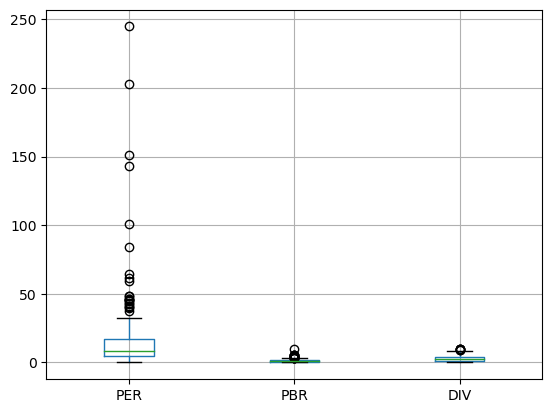

In [12]:
df_kospi_div_sorted.boxplot(column=['PER', 'PBR', 'DIV'])

In [13]:
df_kospi_div_top_100 = df_kospi_div_sorted.head(100)
df_kospi_div_top_100

,Name,BPS,PER,PBR,EPS,DIV,DPS
175330,JB금융지주,23551.0,2.77,0.35,2996.0,10.07,835.0
001120,LX인터내셔널,62867.0,2.10,0.48,14325.0,9.95,3000.0
316140,우리금융지주,39505.0,2.82,0.30,4191.0,9.58,1130.0
024110,기업은행,36302.0,3.04,0.28,3320.0,9.50,960.0
138930,BNK금융지주,30468.0,2.77,0.22,2404.0,9.40,625.0
...,...,...,...,...,...,...,...
353200,대덕전자,17302.0,5.60,1.15,3570.0,2.00,400.0
007310,오뚜기,528433.0,5.73,0.87,80501.0,1.95,9000.0
079550,LIG넥스원,42909.0,13.83,1.82,5641.0,1.92,1500.0
035250,강원랜드,16846.0,32.18,1.09,570.0,1.91,350.0


In [14]:
# 배당금 상위 100개 기업 통계 
df_kospi_div_top_100.describe()

,BPS,PER,PBR,EPS,DIV,DPS
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.387006e+05,13.114300,0.736800,12241.290000,4.369699,3086.140000
std,2.558584e+05,30.543088,0.548883,23774.494444,2.158513,3447.267951
min,0.000000e+00,0.000000,0.000000,0.000000,1.890000,120.000000
25%,3.166550e+04,3.870000,0.370000,2256.000000,2.657500,982.500000
50%,6.954050e+04,7.025000,0.545000,5978.500000,3.560000,1855.000000
75%,1.467438e+05,10.350000,0.962500,13663.500000,5.957500,3500.000000
max,2.272640e+06,244.740000,3.270000,213453.000000,10.070000,20000.000000


In [15]:
df_kospi_div_top_100.boxplot(column=['PER', 'PBR', 'DIV'])

<AxesSubplot:>

In [16]:
df_kospi_div_top_100.to_excel('코스피_배당률_Top100-' + latest_date + '.xlsx')

In [17]:
# 배당금 상위 100개 기업 평균 데이터
df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()
df_kospi_div_top_100_mean

C:\Users\shaws\AppData\Local\Temp\ipykernel_2072\860826845.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()


BPS    138700.570000
PER        13.114300
PBR         0.736800
EPS     12241.290000
DIV         4.369699
DPS      3086.140000
dtype: float64

In [18]:
# 배당금 상위 100개 중 PER, PBR, DIV 기준 평균 초과 기업, 
df_kospi_div_top_100_over_mean = df_kospi_div_top_100[
                     (df_kospi_div_top_100['PER'] < df_kospi_div_top_100_mean['PER']) &
                     (df_kospi_div_top_100['PBR'] < df_kospi_div_top_100_mean['PBR']) &
                     (df_kospi_div_top_100['DIV'] > df_kospi_div_top_100_mean['DIV'])]
df_kospi_div_top_100_over_mean

,Name,BPS,PER,PBR,EPS,DIV,DPS
175330,JB금융지주,23551.0,2.77,0.35,2996.0,10.07,835.0
001120,LX인터내셔널,62867.0,2.10,0.48,14325.0,9.95,3000.0
316140,우리금융지주,39505.0,2.82,0.30,4191.0,9.58,1130.0
024110,기업은행,36302.0,3.04,0.28,3320.0,9.50,960.0
138930,BNK금융지주,30468.0,2.77,0.22,2404.0,9.40,625.0
139130,DGB금융지주,31812.0,3.07,0.22,2266.0,9.35,650.0
029780,삼성카드,73934.0,5.17,0.41,5831.0,8.29,2500.0
086790,하나금융지주,124935.0,3.51,0.33,11803.0,8.08,3350.0
267250,HD현대,105921.0,2.88,0.54,19933.0,8.01,4600.0
005940,NH투자증권,21824.0,10.59,0.43,881.0,7.50,700.0


In [19]:
df_kospi_div_top_100_over_mean.to_excel('코스피_배당률_Top100_중_평균_초과_기업-' + latest_date + '.xlsx')

In [20]:
"""
FIN
"""

'\nFIN\n'